#  Dataset : https://www.kaggle.com/shivamb/netflix-shows

## Import Libraries & Data

In [159]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

import warnings
warnings.filterwarnings("ignore")

In [160]:
#Python version
version = sys.version
print(f"Current Python version is {version}")

Current Python version is 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]


In [161]:
#Import dataset
path = "netflix_titles.csv"
df = pd.read_csv(path)
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
783,s784,Movie,Carnaval,Leandro Neri,"Giovana Cordeiro, Gkay, Bruna Inocencio, Samya...",Brazil,"June 2, 2021",2021,TV-MA,95 min,"Comedies, International Movies, Music & Musicals","After a breakup, an influencer takes her frien..."
3625,s3626,Movie,No One Will Ever Know,Jesús Torres Torres,"Adriana Paz, Jorge A. Jiménez, David Medel, Ar...",Mexico,"August 5, 2019",2017,TV-MA,102 min,"Dramas, International Movies",A mother and young son escape into their own i...
6833,s6834,Movie,Gender Revolution: A Journey with Katie Couric,NaN,Katie Couric,United States,"February 1, 2018",2017,TV-PG,90 min,"Documentaries, LGBTQ Movies",Katie Couric explores our evolving understandi...
4475,s4476,Movie,Shirkers,Sandi Tan,NaN,"United States, United Kingdom","October 26, 2018",2018,TV-14,97 min,Documentaries,"In 1992, Sandi Tan and her friends shot a quir..."
1229,s1230,TV Show,My Way,NaN,"Sherine, Ahmed Fahmi, Bassel Khaiat, Sawsan Ba...",Egypt,"March 6, 2021",2015,TV-14,1 Season,"International TV Shows, TV Dramas","In the 1970s, an aspiring singer struggles to ..."


## sample explore data

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [163]:
#The minimum year of movie is 1925 and maximum year is 2021
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [164]:
#Total rows and columns of dataset
print(f"Total rows of dataset : {df.shape[0]} ")
print(f"Total columns of dataset : {df.shape[1]} ")    

Total rows of dataset : 8807 
Total columns of dataset : 12 


In [165]:
#Checking missing values
miss = pd.DataFrame(df.isnull().sum())
miss = miss.rename(columns = {0 : "miss_count"})
miss['count_percentage'] = (miss.miss_count/len(df)) * 100
miss.sort_values(by = 'count_percentage', ascending = False)

#There are 29% of missing values on director.

,miss_count,count_percentage
director,2634,29.908028
country,831,9.435676
cast,825,9.367549
date_added,10,0.113546
rating,4,0.045418
duration,3,0.034064
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
release_year,0,0.000000


In [166]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

## Exploratory Data Analysis

* What kind of type movie is the most ?
* What about rating ?
* What top 10 country of movie in dataset ?
* What kind of release_year distribution look like ?


In [167]:
#What kind of type movie is the most?

def count_plot(df, col):
    sns.set_style("darkgrid")
    plt.figure(figsize = (12, 7))
    sns.countplot(x = col,
                  data = df,
                  order = df[col].value_counts().to_frame().index)
    plt.ylabel(f"Count of type {col}")
    plt.xlabel("Type")
    plt.title(f"Number of {col}", fontweight = 'bold', fontsize = 15)
    plt.show()
    

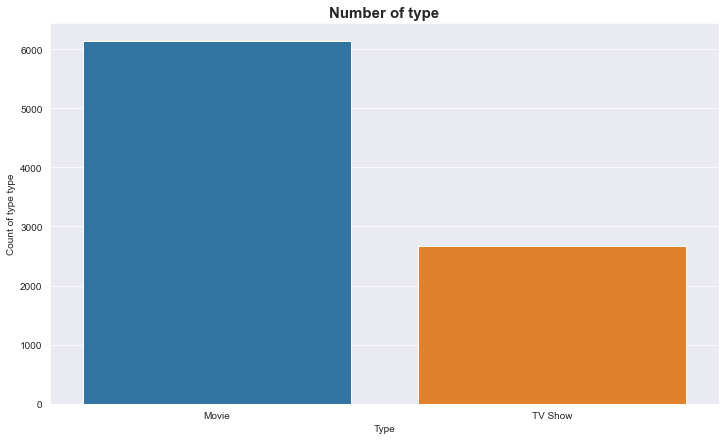

In [168]:
#Number of Movie in dataset is greater than Than TV Show.

count_plot(df, "type")

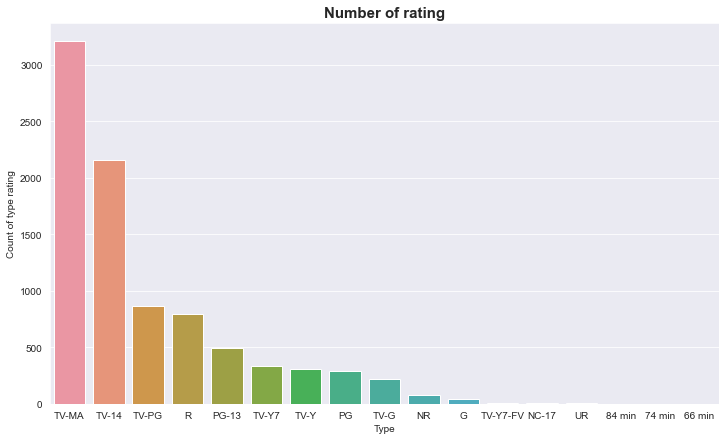

In [169]:
#TV-MA is the most number of rating

count_plot(df, "rating")

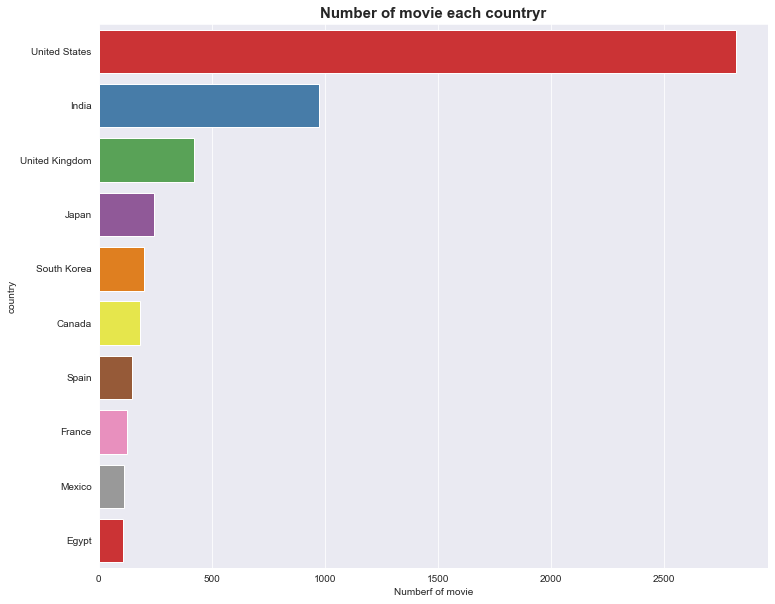

In [170]:
#What top 10 country of movie in dataset ?

plt.figure(figsize = (12, 10))
sns.set_style('darkgrid')
sns.countplot(y = df['country'],
              data = df,
              order = df['country'].value_counts().index[0:10],
              palette = "Set1")
plt.xlabel("Numberf of movie")
plt.title("Number of movie each countryr", fontweight = 'bold', fontsize = 15)
plt.show()


In [171]:
#What kind of release_year distribution look like?
def dist_plot(df, col):
    plt.figure(figsize = (12, 8))
    sns.distplot(df[col], color = "b")
    plt.title(f"Distribution of  {col} ", fontweight = 'bold', fontsize = 15)
    plt.show()

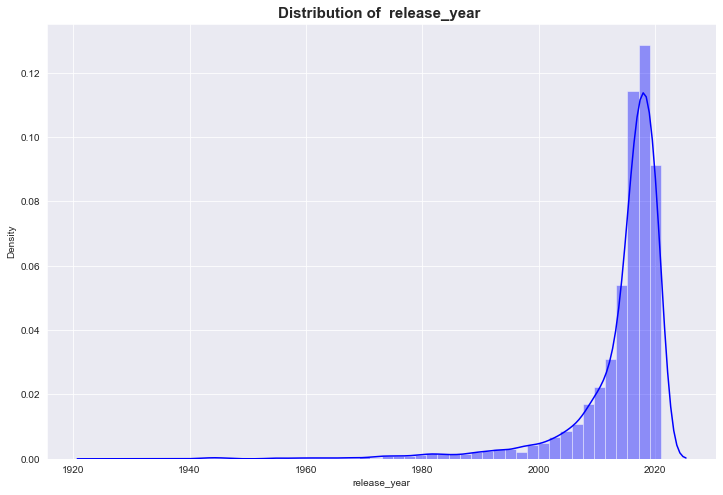

In [172]:
dist_plot(df, "release_year")

## Cleaning data

In [173]:
df.sample(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4151,s4152,Movie,Virsa,Pankaj Batra,"Arya Babbar, Kanwaljeet Singh, Gulshan Grover,...","India, Pakistan","January 30, 2019",2010,TV-14,127 min,"Dramas, International Movies, Music & Musicals",A man is disheartened when he visits his well-...
2547,s2548,Movie,Have a Good Trip: Adventures in Psychedelics,Donick Cary,"Nick Offerman, Adam Scott",United States,"May 11, 2020",2020,TV-MA,86 min,Documentaries,Explore hallucinogenic highs and lows as celeb...
1598,s1599,Movie,Between Maybes,Jason Paul Laxamana,"Gerald Anderson, Julia Barretto, Yayo Aguila, ...",Philippines,"December 3, 2020",2019,TV-14,108 min,"Dramas, International Movies, Romantic Movies","A former actress takes a trip to Japan, where ..."


In [174]:
feature_col = ['title', 'description', 'director', 'cast', 'country', 'rating', 'listed_in']
print(feature_col)

['title', 'description', 'director', 'cast', 'country', 'rating', 'listed_in']


In [175]:
#fillna Missing values with "BLANK VALUE"
for feature in feature_col:
    df[feature] = df[feature].fillna(" ")

In [176]:
df['show_id'] = df['show_id'].str.replace('s', " ")

In [177]:
df['show_id'] = df['show_id'].astype('int')

In [178]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
63,64,Movie,Naruto the Movie: Ninja Clash in the Land of Snow,Tensai Okamura,"Junko Takeuchi, Noriaki Sugiyama, Chie Nakamur...",Japan,"September 15, 2021",2004,TV-PG,83 min,"Action & Adventure, Anime Features, Internatio...","Naruto, Sasuke and Sakura learn they'll be pro..."
2706,2707,Movie,The Killing of a Sacred Deer,Yorgos Lanthimos,"Colin Farrell, Nicole Kidman, Barry Keoghan, A...","Ireland, United Kingdom","April 5, 2020",2017,R,121 min,"Dramas, Independent Movies, Thrillers",A surgeon's carefully curated life edges towar...
8154,8155,Movie,Tayo the Little Bus Movie: Mission Ace,Ryu Jung-woo,"Moon Nam-sook, Jeong Hye-ok, Choe Hana, Gim Ye...",United States,"July 1, 2019",2016,TV-Y7,48 min,Children & Family Movies,"After he loses his favorite racing car, Duri v..."
6471,6472,Movie,Chingo Bling: They Can't Deport Us All,Luis Lopez,Chingo Bling,,"June 1, 2017",2017,TV-MA,63 min,Stand-Up Comedy,"On point and larger than life, rapper and stan..."
8242,8243,Movie,The Charnel House,Craig Moss,"Callum Blue, Nadine Velazquez, Makenzie Moss, ...",United States,"February 4, 2017",2016,R,93 min,"Horror Movies, Thrillers",After an architect transforms a slaughterhouse...


## Content Based  Filtering  with TfidfVectorizer  -- Combine 5 features --

In [179]:
#Combining 5 featues

df_combined = df['title'] + ' ' + df['description'] + ' ' + df['director'] + ' ' + df['cast'] + ' ' + df['country'] + ' ' + df['rating'] + ' ' + df['listed_in']

In [180]:
print(df_combined)

0       Dick Johnson Is Dead As her father nears the e...
1       Blood & Water After crossing paths at a party,...
2       Ganglands To protect his family from a powerfu...
3       Jailbirds New Orleans Feuds, flirtations and t...
4       Kota Factory In a city of coaching centers kno...
                              ...                        
8802    Zodiac A political cartoonist, a crime reporte...
8803    Zombie Dumb While living alone in a spooky tow...
8804    Zombieland Looking to survive in a world taken...
8805    Zoom Dragged from civilian life, a former supe...
8806    Zubaan A scrappy but poor boy worms his way in...
Length: 8807, dtype: object


In [181]:
#Import TfIdVectorizer from sckit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

In [182]:
#converting the text data to feature vectors

vectorizer = TfidfVectorizer(stop_words = 'english')

In [183]:
df_vector = vectorizer.fit_transform(df_combined)

In [184]:
print(df_vector)

  (0, 13011)	0.09782295563870866
  (0, 20)	0.11343169018895011
  (0, 35914)	0.07915176290564059
  (0, 44812)	0.05517474677481565
  (0, 49018)	0.05109202863994848
  (0, 22004)	0.26532423397425653
  (0, 15484)	0.15663751334235573
  (0, 20278)	0.1294306247837855
  (0, 50713)	0.17837397109773395
  (0, 9917)	0.2448553670735508
  (0, 22344)	0.2448553670735508
  (0, 11629)	0.14014734477658966
  (0, 44701)	0.21983437930078364
  (0, 25265)	0.4355939936939958
  (0, 16199)	0.18052257904184363
  (0, 27229)	0.09705415426264533
  (0, 14597)	0.16987862376619356
  (0, 32673)	0.24030324620148935
  (0, 15809)	0.12742618191263458
  (0, 11602)	0.16987862376619356
  (0, 23530)	0.47066014782501797
  (0, 12505)	0.22202281237941254
  (1, 32049)	0.08617203420801772
  (1, 13366)	0.032792152533742076
  (1, 43051)	0.041901703071456645
  :	:
  (8806, 49875)	0.1646392904217417
  (8806, 12487)	0.17585647598486132
  (8806, 30078)	0.19394134106341518
  (8806, 48630)	0.16824486557070367
  (8806, 41732)	0.17772867011314

## Cosine Similarity

In [185]:
#Import Library
import difflib
from sklearn.metrics.pairwise import cosine_similarity

In [186]:
#getting the similarity score
similarity = cosine_similarity(df_vector)

In [187]:
print(similarity)

[[1.         0.         0.         ... 0.00490356 0.01737977 0.        ]
 [0.         1.         0.01495671 ... 0.         0.         0.00496259]
 [0.         0.01495671 1.         ... 0.         0.00443158 0.00870496]
 ...
 [0.00490356 0.         0.         ... 1.         0.04744947 0.0016683 ]
 [0.01737977 0.         0.00443158 ... 0.04744947 1.         0.00651916]
 [0.         0.00496259 0.00870496 ... 0.0016683  0.00651916 1.        ]]


In [188]:
print(similarity.shape)

(8807, 8807)


In [189]:
similarity[1]

array([0.        , 1.        , 0.01495671, ..., 0.        , 0.        ,
       0.00496259])

In [191]:
#Movie Recommendation System

#getting the movie name
movie_name = input("Enter the favorite movie name : ")

#Convert "title" to list
list_of_title = df['title'].tolist()

#import difflib
find_close_match = difflib.get_close_matches(movie_name, list_of_title)

close_match = find_close_match[0]

#Index movie relate with "show_id" column
index_of_movie = df[df['title'] == close_match]['show_id'].values[0]

#Similarity
similarity_score = list(enumerate(similarity[index_of_movie]))

#Sort
sorted_similarity_movie = sorted(similarity_score, key = lambda x : x[1], reverse = True)

#name of similar movie 

print("Movies suggested for you : \n")

i = 1

for movie in sorted_similarity_movie:
    index = movie[0]
    title_from_index = df[df['show_id'] == index + 1]['title'].values[0]
    if (i < 16):
        print(i,'.', title_from_index)
        i+=1

Enter the favorite movie name : Bat man
Movies suggested for you : 

1 . Bates Motel
2 . Norman Lear: Just Another Version of You
3 . Tracy Morgan: Staying Alive
4 . Motel Makeover
5 . ReMastered: The Two Killings of Sam Cooke
6 . Hyper HardBoiled Gourmet Report
7 . Scream
8 . The Magicians
9 . Final Destination 2
10 . Crime Scene: The Vanishing at the Cecil Hotel
11 . Jinxed
12 . The Conjuring 2
13 . Sex/Life
14 . Revolutionary Road
15 . Henry Danger


## Content Based Filtering with TfidfVectorizer -- 1 featured "Description" --

In [192]:
df['description'].sample(10)

5569    Recent retiree Takeshi rediscovers his passion...
8423    Some have big feet or a sniffly nose, others a...
3714    After the brutal murders of their loved ones, ...
8158    In this animated adventure, Master Splinter wh...
7094    A boy with a hearing and speech impairment – a...
612     Set in the year 1402, this prequel follows Luc...
1562    An aimless gamer and his two friends find them...
1502    Bawdy comedian and television presenter London...
989     Days before Eid, a salesman fired from his job...
6408    Inspired by the famous song "Contrabando y Tra...
Name: description, dtype: object

In [193]:
#Import TfIdVectorizer from sckit-learn
#from sklearn.feature_extraction.text import TfidfVectorizer

#tfidf = TfidfVectorizer(stop_words = 'english')

tfidf_matrix = vectorizer.fit_transform(df['description'])

In [194]:
tfidf_matrix.shape

(8807, 18895)

## Linear_kernel

In [195]:
#Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

#Compute the cosine similality matrix
similarity_des = linear_kernel(tfidf_matrix, tfidf_matrix)

In [196]:
#similarity_des = cosine_similarity(tfidf_matrix)

In [197]:
similarity_des.shape

(8807, 8807)

In [198]:
similarity_des[1]

array([0., 1., 0., ..., 0., 0., 0.])

In [199]:
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [200]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, similarity_des=similarity_des):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(similarity_des[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [201]:
get_recommendations('The Irishman')

3759    Rolling Thunder Revue: A Bob Dylan Story by Ma...
2576                                  All Day and a Night
8739                   Why We Fight: The Battle of Russia
1430                                  Pretend It’s a City
329                                   Catch Me If You Can
3181                        The Irishman: In Conversation
726                       Metallica: Some Kind of Monster
4851    Steve Martin and Martin Short: An Evening You ...
6596                                     Detention Letter
7411                      Martin Lawrence Live: Runteldat
Name: title, dtype: object